- Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

## Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

In [1]:
import pandas as pd 
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
brfss = pd.read_hdf('brfss.hdf5')

In [3]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


## Plot income and education

To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

In [4]:
gss = pd.read_hdf('gss.hdf5')

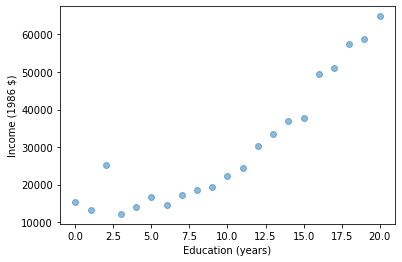

In [5]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.clf()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

## Making predictions

## Visualizing predictions

Now let's visualize the results

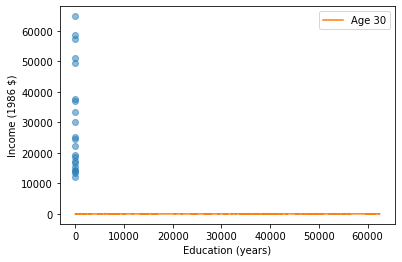

In [14]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
#pred = results.predict(df)
plt.plot(gss['educ'], label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()